# Day 1 - Part 2 - Processing

Text processing involves tokenization, stemming, lemmatization, and other techniques to transform text into a more digestible format for futher analysis.

We might want to normalize text by removing punctuation, converting to lowercase, and removing stop words. We might also want to stem or lemmatize words to reduce them to their root form.

## Importing Libraries

Before we get started, let's import the libraries we'll need.

In [1]:
# we will want the usual libraries for reading and processing data

from pathlib import Path

# counter for counting things
from collections import Counter

# regular expressions for cleaning

# string for cleaning

import string

# regular expressions for cleaning

import re

# for timestamps
from datetime import datetime

import pandas as pd
print(f"Pandas version: {pd.__version__}")

# we will also want to use spacy for tokenization and lemmatization and stop word removal

import spacy
print(f"Spacy version: {spacy.__version__}")

Pandas version: 2.2.2
Spacy version: 3.7.4


In [7]:
# first let's download csv file from the web url
url = "https://github.com/ValRCS/BSSDH_2024_workshop/raw/main/data/old_bailey_sample_1720_1913.csv"

# we will use pandas read_csv function to read the csv file
# and we will use the url directly
# index will simply be the row number
# df = pd.read_csv(url, index_col=0)
df = pd.read_csv(url)
# read csv is very powerful function and can read from local files, urls, and even compressed files
# it contains many options, but we will use only the most basic ones
print("Dataframe shape", df.shape)
# first let's see what we have
df.head()


Dataframe shape (1637, 5)


,file_name,year,trial_number,punishment,text
0,OBC2-17200427.xml,1720,1,Transportation,",of St. Leonard Eastcheap , was indicted ..."
1,OBC2-17200427.xml,1720,2,Transportation,"Alice Jones , of St. Michael's Cornhi..."
2,OBC2-17200427.xml,1720,3,Transportation,"James Wilson , of St Katharine Colema..."
3,OBC2-17200427.xml,1720,4,Transportation,"James Mercy , alias Masse , of St...."
4,OBC2-17200427.xml,1720,5,Transportation,"Benjamin Cook , alias Richard Smith ..."


In [8]:
# let's get info on the dataframe
df.info() # returns datatypes and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file_name     1637 non-null   object
 1   year          1637 non-null   int64 
 2   trial_number  1637 non-null   int64 
 3   punishment    1162 non-null   object
 4   text          1637 non-null   object
dtypes: int64(2), object(3)
memory usage: 64.1+ KB


In [9]:
# let's check our year and trial stats
df.describe() # will give us basic stats on numeric columns


,year,trial_number
count,1637.000000,1637.000000
mean,1823.500916,49.329872
std,55.472725,34.327506
min,1720.000000,1.000000
25%,1784.000000,22.000000
50%,1821.000000,44.000000
75%,1865.000000,70.000000
max,1913.000000,173.000000


In [10]:
# we can get stats on non-numeric columns
df.describe(include="object") # will give us basic stats on non-numeric columns

,file_name,punishment,text
count,1637,1162,1637
unique,20,274,1637
top,OBC2-18211205.xml,[Transportation. See summary.],",of St. Leonard Eastcheap , was indicted ..."
freq,173,106,1


In [11]:
# before we proceed further let's do some simple analysis of text that we have
# let's get all the text in one big string
# we will use join function to join all the text in one big string
# we will use the pandas apply function to apply join function to all the rows

full_text = " ".join(list(df.text.apply(str)))
print("Full text length", len(full_text))
# print first 100 characters
print(full_text[:100])
# print last 100 characters
print(full_text[-100:])

Full text length 5440371
,of St. Leonard Eastcheap      , was indicted for     feloniously stealing 70 Pound weight of Tobacc
4, 1907, of felony, and other convictions were proved.  Sentence:      Three years' penal servitude.


In [13]:
# let's perform some symbol analysis
counter = Counter(full_text)
# Counter returns a dictionary with key value pairs and some extra methods "benefits"
print(*counter.most_common(30), sep="\n")

(' ', 1198622)
('e', 487334)
('t', 353316)
('o', 310247)
('a', 301971)
('n', 271984)
('h', 245842)
('i', 226090)
('s', 223559)
('r', 221192)
('d', 173761)
('l', 115419)
('m', 99720)
('w', 95624)
('u', 94370)
('c', 87851)
('f', 77862)
(',', 68220)
('y', 65537)
('.', 64935)
('g', 63788)
('p', 63481)
('b', 55458)
('I', 53482)
('k', 37572)
('v', 34002)
('—', 28417)
('A', 17137)
('M', 17121)
('-', 15297)


In [15]:
# let's get a full counter of all the symbols and put them into a new dataframe
df_symbols = pd.DataFrame.from_dict(counter, orient='index').reset_index()
# rename the columns
df_symbols.columns = ['symbol', 'count']
# see the first 5 entries
df_symbols.head()

,symbol,count
0,",",68220
1,o,310247
2,f,77862
3,,1198622
4,S,14383


In [16]:
df_symbols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   symbol  100 non-null    object
 1   count   100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [17]:
# order by count column
df_symbols.sort_values(by='count', ascending=False, inplace=True) # inplace will modify the dataframe
df_symbols.head(25)

,symbol,count
3,,1198622
8,e,487334
5,t,353316
1,o,310247
10,a,301971
9,n,271984
16,h,245842
19,i,226090
14,s,223559
11,r,221192


<Axes: xlabel='symbol'>

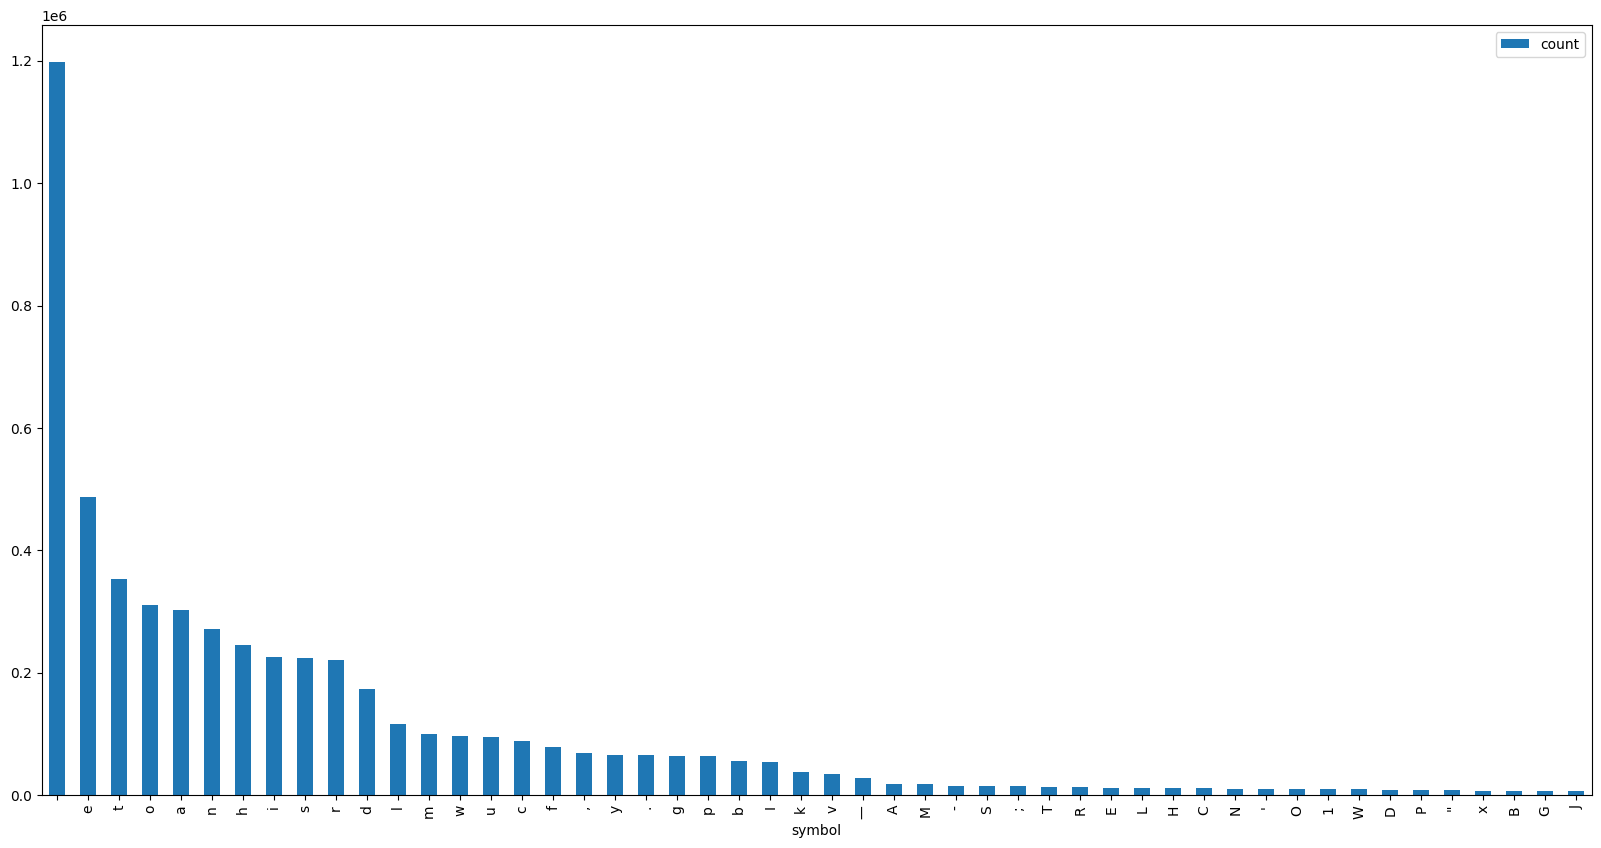

In [18]:
# let's plot top 50 symbols
df_symbols.head(50).plot.bar(x='symbol', y='count', figsize=(20, 10))


In [19]:
# how many symbols do we have?
print("Number of unique symbols", len(df_symbols), df_symbols.shape)

Number of unique symbols 100 (100, 2)


In [20]:
# let's see the tail of the dataframe
df_symbols.tail(25)

,symbol,count
75,],267
61,Z,248
76,+,195
69,!,159
79,/,158
77,*,156
78,X,121
63,&,96
80,|,18
84,†,16


<Axes: xlabel='symbol'>

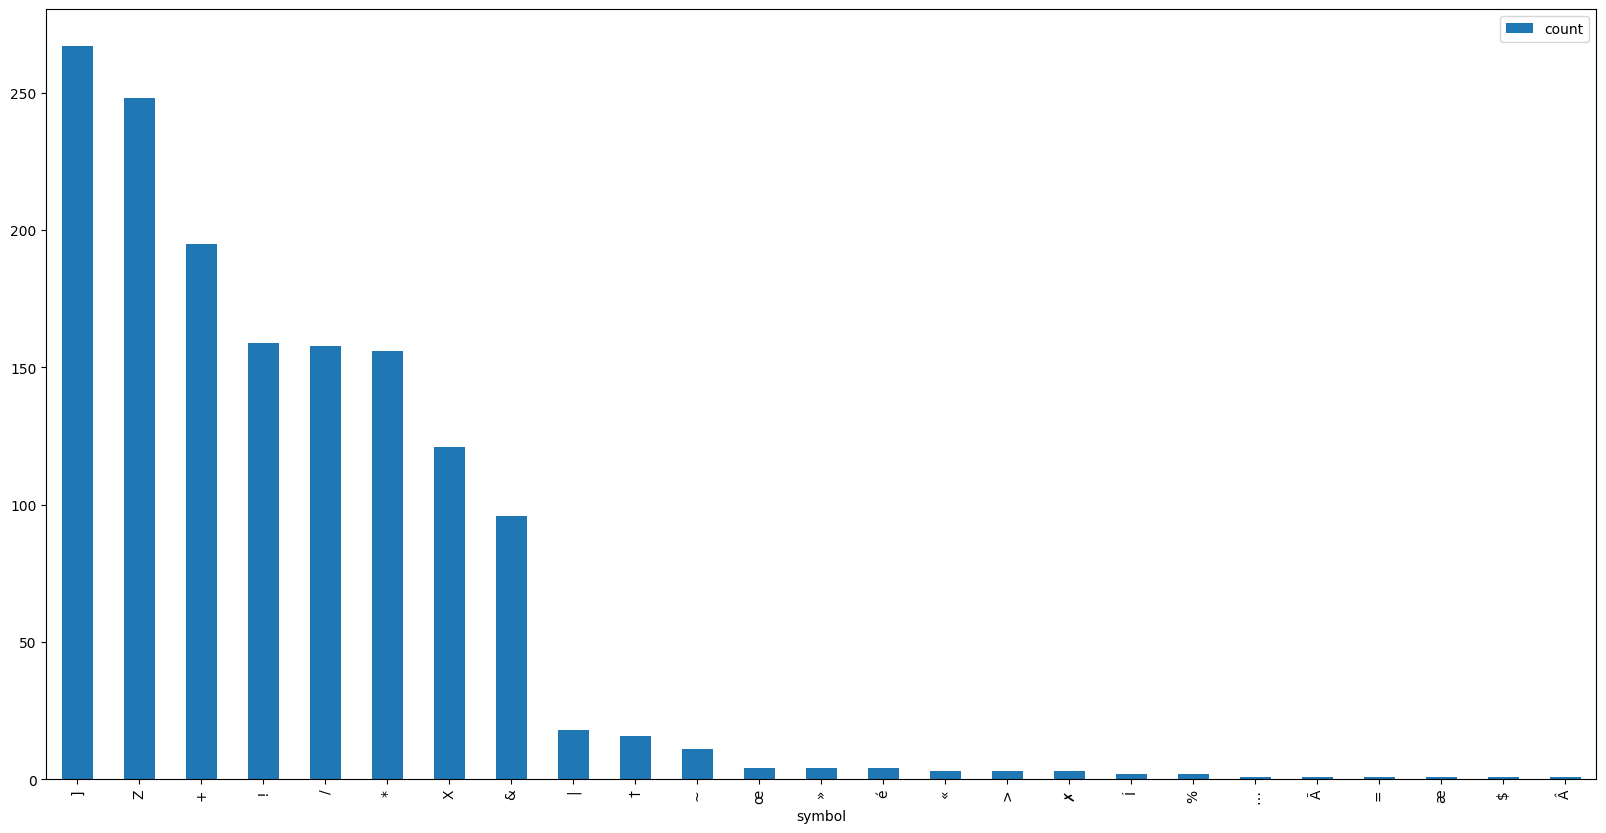

In [21]:
# let's plot this tail as well
df_symbols.tail(25).plot.bar(x='symbol', y='count', figsize=(20, 10))
# so when we give tail it is a dataframe with 25 rows, and we can plot it directly

In [22]:
# how many unique symbols do we have?
print("Unique symbols", len(df_symbols))
# round numbers are a bit suspicious


Unique symbols 100


In [23]:
# ord function
# ord function returns the unicode code of a character
# for example
print(ord("a")) # returns 97 because a is 97 in unicode also a is 97 in ascii
# ascii table is a subset of unicode table
# see https://en.wikipedia.org/wiki/ASCII

97


In [25]:
try:
    print(ord("Valdis")) # this will fail because ord function expects a single character
except Exception as e: # we catch the exception and print it
    print(e)

ord() expected a character, but string of length 6 found


In [26]:
# let's get unicode number for each symbol
# so I supply column name and apply ord function to each symbol
df_symbols['unicode'] = df_symbols.symbol.apply(ord)
df_symbols.head()

,symbol,count,unicode
3,,1198622,32
8,e,487334,101
5,t,353316,116
1,o,310247,111
10,a,301971,97


In [27]:
df_symbols.unicode > 127 # this means non-ascii symbols

3     False
8     False
5     False
1     False
10    False
      ...  
87     True
85    False
94     True
96    False
98     True
Name: unicode, Length: 100, dtype: bool

In [28]:
# how to apply a filter over pandas dataframe and save results to a new dataframe- actually a slice
over_127 = df_symbols[df_symbols.unicode > 127] # this is a slice of the dataframe not a copy
# if you need real copy then use copy() function
print("Symbols over 127", len(over_127))

Symbols over 127 13


In [29]:
# display all the symbols over 127
over_127

,symbol,count,unicode
83,—,28417,8212
86,£,662,163
84,†,16,8224
89,œ,4,339
90,»,4,187
99,é,4,233
91,«,3,171
97,✗,3,10007
93,Í,2,205
88,…,1,8230


<Axes: xlabel='symbol'>

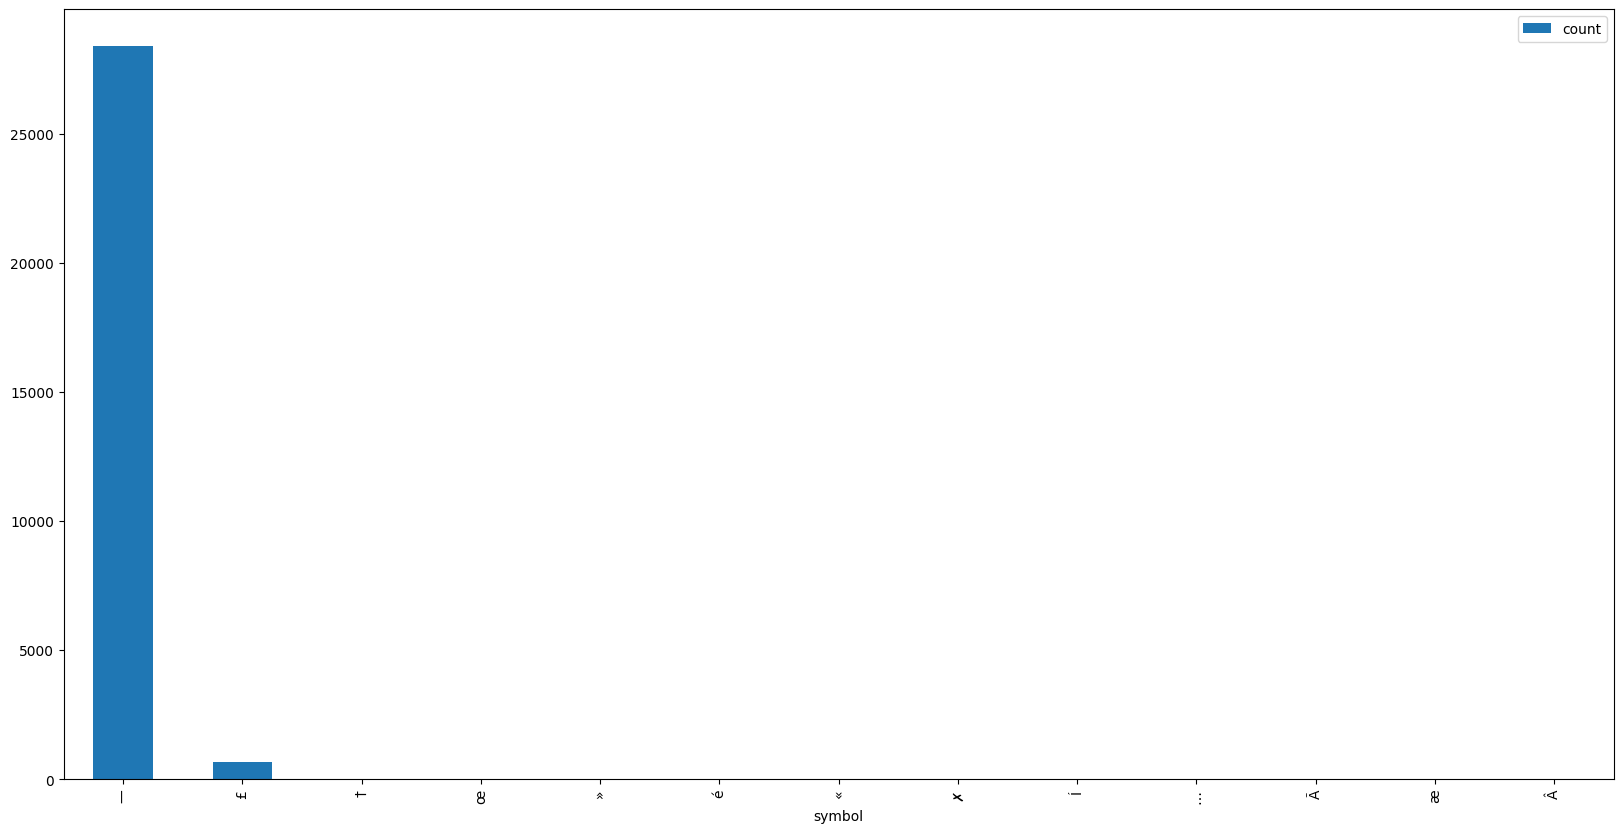

In [30]:
# let's plot the symbols over 127
over_127.plot.bar(x='symbol', y='count', figsize=(20, 10))

## Conclusion from symbol analysis

Looks like we do not have too many strange symbols outside the usual ASCII range. We can probably get away with just removing punctuation and converting to lowercase.

What do those strange symbols actually mean?

My wild guess as a non-specialist in old English is that they are part of the old English alphabet. I'm not sure if they are actually used in the text or if they are just artifacts of the OCR process.

In any case there are not that many of them so we can probably just remove them or leave them in as is.

Main thing we will want to do is remove extra whitespace as extra whitespace can cause problems with tokenization.

In [ ]:
# full list of whitespace characters in Python: https://docs.python.org/3/library/string.html#string.whitespace

In [31]:
# let's replace extra whitespace with single whitespace
# we will use regular expression for this
# to test your regex you can use https://regex101.com/

# let's define a function that will replace all the extra whitespace with single whitespace
def replace_whitespace(txt: str) -> str:
    return re.sub(r'\s+', ' ', txt) # \s means whitespace, + means one or more, r means raw string - why? because it's easier to read

# let's test it
replace_whitespace("Hello    world \t \n and Baltic Humanities Summer  \n School")

'Hello world and Baltic Humanities Summer School'

In [40]:
# now let's apply this function to all the text in the dataframe
# length of full text joined as string
full_text = " ".join(list(df.text.apply(str)))
print("Full text length", len(full_text))
# start of cleaning
print(f"Start cleaning at {datetime.now()}")
df['text'] = df.text.apply(replace_whitespace) 
print(f"End cleaning at {datetime.now()}")

# size after cleaning
full_text = " ".join(list(df.text.apply(str)))
print("Full text length after cleaning", len(full_text))
# warning - this might take a while on large dataframes
# also this replaces all the text in the dataframe
# if we wanted to keep original we could have created a new column
# with df['text_clean'] = df.text.apply(replace_whitespace)


Full text length 5285590
Start cleaning at 2024-07-23 14:17:56.759272
End cleaning at 2024-07-23 14:17:57.227839
Full text length after cleaning 5285590


In [37]:
# let's see our unique symbols again
# let's make a function that will take a dataframe and column name and return counter of symbols
def get_symbol_counter(df, column_name):
    full_text = " ".join(list(df[column_name].apply(str)))
    # is there anything missing/extra here? class question
    counter = Counter(full_text)
    # 0 refers to the key of the dictionary
    return pd.DataFrame.from_dict(counter, orient='index').reset_index().sort_values(by=0, ascending=False)

# let's get the counter
df_symbols_cleaned = get_symbol_counter(df, 'text')
df_symbols_cleaned.columns = ['symbol', 'count']
# sort by count
df_symbols_cleaned.sort_values(by='count', ascending=False, inplace=True)
df_symbols_cleaned.head()

,symbol,count
3,,1042205
8,e,487334
5,t,353316
1,o,310247
10,a,301971


In [41]:
df.head()

,file_name,year,trial_number,punishment,text
0,OBC2-17200427.xml,1720,1,Transportation,",of St. Leonard Eastcheap , was indicted for f..."
1,OBC2-17200427.xml,1720,2,Transportation,"Alice Jones , of St. Michael's Cornhill , was ..."
2,OBC2-17200427.xml,1720,3,Transportation,"James Wilson , of St Katharine Coleman , was i..."
3,OBC2-17200427.xml,1720,4,Transportation,"James Mercy , alias Masse , of St. Andrew Unde..."
4,OBC2-17200427.xml,1720,5,Transportation,"Benjamin Cook , alias Richard Smith , of St. M..."


In [42]:
# let's get text from second row and we want first 100 characters
df.text[1][:100]

"Alice Jones , of St. Michael's Cornhill , was indicted for privately stealing a Bermundas Hat, value"

In [43]:
# now let's create a temp folder and save our cleaned dataframe there

# first let's create a path to our temp folder
temp_folder = Path("temp")
# now let's create this folder if this folder does not exist
temp_folder.mkdir(exist_ok=True)
# now let's create a path to our file
temp_file = temp_folder / "old_bailey_sample_1720_1913_cleaned.csv"
# now let's save our dataframe to this file
# we do not need index column, index columns can keep growing and growing and growing...
df.to_csv(temp_file, index=False)

## Removing punctuation

We at an important point in our text processing pipeline. We have a raw text file and we want to convert it into a format that is more suitable for analysis.

One of the basic steps we can take is to remove punctuation. Punctuation is not usually important for analysis and can cause problems with tokenization.

There might be cases where we want to keep punctuation especially if we want to do some kind of analysis on it. For example, we might want to see how many exclamation points are used in a text. 

Also punctuation is used to separate sentences so we might want to keep it if we want to do sentence level analysis.

Today we will just remove punctuation but we will keep it in mind for future analysis.

In [44]:
# so basic punctuation
# this comes with Python
string.punctuation, "".join(list(over_127.symbol))

('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', '—£†œ»é«✗Í…ÃæÂ')

In [45]:
# Python has a built in list of english punctuation symbols in string.punctuation

# we can use it in conjustion with maketrans function to create a translation table
# translation table is a dictionary that maps one symbol to another
# we will use this translation table to translate all the symbols in our text

# first let's create a translation table

# we will use maketrans function to create a translation table

# first we will create a string with all the symbols that we want to replace
# we will use string.punctuation for this
# we will also add all the symbols over 127 - this is another factor that should be considered and noted like we do now
# our justification for removing these symbols is that they are not part of the english language

# now if we were working in Latvian, Estonian, Finnish and so on then we would need to have a different set of symbols that we want to remove
# most other languages besides English utilize symbols over 127

bad_chars = string.punctuation + "".join(list(over_127.symbol))
print("Bad chars to be replaced", bad_chars)
# create translation table - we replace all the bad_chars with empty string
translation_table = str.maketrans(dict.fromkeys(bad_chars, ""))
print(translation_table)

Bad chars to be replaced !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~—£†œ»é«✗Í…ÃæÂ
{33: '', 34: '', 35: '', 36: '', 37: '', 38: '', 39: '', 40: '', 41: '', 42: '', 43: '', 44: '', 45: '', 46: '', 47: '', 58: '', 59: '', 60: '', 61: '', 62: '', 63: '', 64: '', 91: '', 92: '', 93: '', 94: '', 95: '', 96: '', 123: '', 124: '', 125: '', 126: '', 8212: '', 163: '', 8224: '', 339: '', 187: '', 233: '', 171: '', 10007: '', 205: '', 8230: '', 195: '', 230: '', 194: ''}


In [47]:
# since I am curious of how many characters will be removed I will create a column of text length before cleaning
df['dirty_len'] = df.text.apply(len)
# print total length of all the text
print("Total length of all the text", df.dirty_len.sum())
df.head()


Total length of all the text 5283954


,file_name,year,trial_number,punishment,text,dirty_len
0,OBC2-17200427.xml,1720,1,Transportation,",of St. Leonard Eastcheap , was indicted for f...",705
1,OBC2-17200427.xml,1720,2,Transportation,"Alice Jones , of St. Michael's Cornhill , was ...",1087
2,OBC2-17200427.xml,1720,3,Transportation,"James Wilson , of St Katharine Coleman , was i...",904
3,OBC2-17200427.xml,1720,4,Transportation,"James Mercy , alias Masse , of St. Andrew Unde...",804
4,OBC2-17200427.xml,1720,5,Transportation,"Benjamin Cook , alias Richard Smith , of St. M...",483


In [48]:
# now we need to apply our translation table to all the text in the dataframe
# we will use apply function again
# we will use lambda function to apply our translation table to each row
# we will use str.translate function to translate each row

# let's define a function that will translate each row
def translate_text(text: str) -> str:
    return text.translate(translation_table) # so translation table is a dictionary that maps one symbol to another

# let's apply this function to all the text in the dataframe
# start of cleaning
print(f"Start cleaning at {datetime.now()}")
df['text'] = df.text.apply(translate_text) # this is faster than iterating over each row with iterrows
print(f"End cleaning at {datetime.now()}")
# warning - this might take a while on large dataframes

Start cleaning at 2024-07-23 14:25:55.683414
End cleaning at 2024-07-23 14:25:56.545010


In [49]:
# now I want to see how many characters are in clean text
df['clean_len'] = df.text.apply(len)

# print total length of all the text
print("Total length of all the text", df.clean_len.sum())

df.head()

Total length of all the text 5061550


,file_name,year,trial_number,punishment,text,dirty_len,clean_len
0,OBC2-17200427.xml,1720,1,Transportation,of St Leonard Eastcheap was indicted for felo...,705,684
1,OBC2-17200427.xml,1720,2,Transportation,Alice Jones of St Michaels Cornhill was indi...,1087,1053
2,OBC2-17200427.xml,1720,3,Transportation,James Wilson of St Katharine Coleman was ind...,904,883
3,OBC2-17200427.xml,1720,4,Transportation,James Mercy alias Masse of St Andrew Undersh...,804,778
4,OBC2-17200427.xml,1720,5,Transportation,Benjamin Cook alias Richard Smith of St Mary...,483,466


In [50]:
# How many characters did we remove?
print("Characters removed", df.dirty_len.sum() - df.clean_len.sum())

Characters removed 222404


In [51]:
# now we ara ready to save our cleaned dataframe again
# I will overwrite the previous file, but you can create a new file if you want
print(f"Saving to {temp_file}")
df.to_csv(temp_file, index=False)

Saving to temp\old_bailey_sample_1720_1913_cleaned.csv


# Tokenization, Normalization, Stemming, Lemmatization

Now that we have text more or less in a format we can work with, let's do some tokenization, normalization, stemming, and lemmatization.

Tokenization means splitting text into tokens. In our case we will split on whitespace.

### Normalization

In [52]:
# now in many cases normalizing text is a good idea
# normalization is typically done to lowercase all the text
# this is done because uppercase and lowercase letters are different symbols
# for most cases we do not care about the difference between uppercase and lowercase letters

# some cases where we might care about the difference between uppercase and lowercase letters
# 1. if we are doing named entity recognition
# 2. if we are doing sentiment analysis using lexicons that are case sensitive
# 3. if we are doing stylometry and we want to detect authorship based on the use of uppercase and lowercase letters

# let's lowercase all the text
# we will use str.lower function to lowercase all the text

# let's apply this function to all the text in the dataframe

# start of cleaning
print(f"Start cleaning at {datetime.now()}")
df['text'] = df.text.str.lower() # this is faster than iterating over each row with iterrows
print(f"End cleaning at {datetime.now()}")
# warning - this might take a while on large dataframes

# check if there are any uppercase letters left
# we will use isupper function to check if there are any uppercase letters
# we will use any function to check if there are any True values in the column

# let's define a function that will check if there are any uppercase letters
def check_uppercase(text):
    return any([char.isupper() for char in text]) # there is also all function that checks if all the values are True

# let's apply this function to all the text in the dataframe
# we could have used lambda function here, but I wanted to show you that you can define a function and use it
df.text.apply(check_uppercase).sum()
# 0 indicates that there are no uppercase letters left in any of the rows


Start cleaning at 2024-07-23 14:29:42.895734
End cleaning at 2024-07-23 14:29:42.904262


0

### Tokenization

Tokenization is the process of splitting text into tokens. A token is a sequence of characters that we want to treat as a group. For example, we might want to treat punctuation as a token or we might want to treat words as tokens.

Here we will use word tokenization which means we will split on whitespace and treat words as tokens.

In [53]:
# Python has an extermely handy build in function for splitting text into words
# it's called split
# by default it splits on whitespace

# let's split all the text into words

# let's define a function that will split text into words
def split_text(text):
    return text.split() # we could use some other separator here, but we will use default which is any whitespace 
# - we do not have multiple whitespaces anymore or do we?

In [54]:
# let's count how many rows contain multiple whitespaces in a row
# we will use regex for this
# we will use str.contains function to check if there are multiple whitespaces in a row

# let's define a function that will check if there are multiple whitespaces in a row
def check_multiple_whitespaces(text):
    return re.search(r'\s{2,}', text) is not None # \s means whitespace, {2,} means two or more, r means raw string - why? because it's easier to read

# let's apply this function to all the text in the dataframe
print("Multiple whitespaces", df.text.apply(check_multiple_whitespaces).sum())
# Total rows
print("Total rows", len(df))
# So what happened? Why did so many rows have multiple whitespaces?
# remember when we joined all the text in one big string?
# when joining we used space as a separator it is possible that some of the rows had multiple whitespaces in a row

# in any case it is not an issue for us, because we will split the text into words and we will not care about multiple whitespaces




Multiple whitespaces 1626
Total rows 1637


In [56]:
# however if we wanted to remove the extra whitespaces we could have done it with regex

# let's define a function that will remove multiple whitespaces
def remove_multiple_whitespaces(text):
    return re.sub(r'\s{2,}', ' ', text) # \s means whitespace, {2,} means two or more, r means raw string - why? because it's easier to read


# let's apply this function to all the text in the dataframe
# start of cleaning
print(f"Start cleaning at {datetime.now()}")
df['text'] = df.text.apply(remove_multiple_whitespaces) # this is faster than iterating over each row with iterrows
print(f"End cleaning at {datetime.now()}")

# now how many multiple whitespaces do we have?
print("Multiple whitespaces", df.text.apply(check_multiple_whitespaces).sum())

Start cleaning at 2024-07-23 14:32:22.936227
End cleaning at 2024-07-23 14:32:23.043341
Multiple whitespaces 0


In [57]:
# we will create a new column with words for each row
# we will use apply function to apply split_text function to each row
# we will use lambda function to apply split_text function to each row

# let's define a function that will split text into words
# def split_text(text):
#     return text.split() # we could use some other separator here, but we will use default which is any whitespace

# let's apply this function to all the text in the dataframe

# start of cleaning
print(f"Start cleaning at {datetime.now()}")
# df['words'] = df.text.apply(split_text) # this is faster than iterating over each row with iterrows
# i could do the above line, but I will use lambda function instead
#df['words'] = df.text.apply(lambda txt: txt.split()) # this is faster than iterating over each row with iterrows
# we could even used split directly - the easiest to read
df['words'] = df.text.str.split() # this is faster than iterating over each row with iterrows
print(f"End cleaning at {datetime.now()}")

# let's print the data types of all the columns
df.dtypes

Start cleaning at 2024-07-23 14:34:59.782820
End cleaning at 2024-07-23 14:34:59.890390


file_name       object
year             int64
trial_number     int64
punishment      object
text            object
dirty_len        int64
clean_len        int64
words           object
dtype: object

In [58]:
# print first 5 rows
df.head()

,file_name,year,trial_number,punishment,text,dirty_len,clean_len,words
0,OBC2-17200427.xml,1720,1,Transportation,of st leonard eastcheap was indicted for felon...,705,684,"[of, st, leonard, eastcheap, was, indicted, fo..."
1,OBC2-17200427.xml,1720,2,Transportation,alice jones of st michaels cornhill was indict...,1087,1053,"[alice, jones, of, st, michaels, cornhill, was..."
2,OBC2-17200427.xml,1720,3,Transportation,james wilson of st katharine coleman was indic...,904,883,"[james, wilson, of, st, katharine, coleman, wa..."
3,OBC2-17200427.xml,1720,4,Transportation,james mercy alias masse of st andrew undershaf...,804,778,"[james, mercy, alias, masse, of, st, andrew, u..."
4,OBC2-17200427.xml,1720,5,Transportation,benjamin cook alias richard smith of st mary a...,483,466,"[benjamin, cook, alias, richard, smith, of, st..."


In [59]:
# let's get word count for each row

# we will apply len function to each row

# df['word_count'] = df.words.apply(len) # we could have made our own function here, but we will use len function
# we could skip apply and just use str.len() function
df['word_count'] = df.words.str.len() # this is faster than iterating over each row with iterrows

df.head()
# it looks correct since ratio of clean_len and word_count is close to 5 which is about average word length in English
# it might be a bit confusing since words are stored in an object type column which is not a pure list

,file_name,year,trial_number,punishment,text,dirty_len,clean_len,words,word_count
0,OBC2-17200427.xml,1720,1,Transportation,of st leonard eastcheap was indicted for felon...,705,684,"[of, st, leonard, eastcheap, was, indicted, fo...",129
1,OBC2-17200427.xml,1720,2,Transportation,alice jones of st michaels cornhill was indict...,1087,1053,"[alice, jones, of, st, michaels, cornhill, was...",200
2,OBC2-17200427.xml,1720,3,Transportation,james wilson of st katharine coleman was indic...,904,883,"[james, wilson, of, st, katharine, coleman, wa...",177
3,OBC2-17200427.xml,1720,4,Transportation,james mercy alias masse of st andrew undershaf...,804,778,"[james, mercy, alias, masse, of, st, andrew, u...",143
4,OBC2-17200427.xml,1720,5,Transportation,benjamin cook alias richard smith of st mary a...,483,466,"[benjamin, cook, alias, richard, smith, of, st...",88


## Stop words

Often times there are many words in a text that are not important for analysis. These words are called stop words. We can remove stop words to reduce the size of our vocabulary and speed up analysis.



In [60]:
# let's get a list of all stop words from spacy

# we might need to download en_core_web_sm model first
# we can do it with python -m spacy download en_core_web_sm

# in jupyter notebook we can do it with !python -m spacy download en_core_web_sm

# first we will load spacy english model
nlp = spacy.load("en_core_web_sm")

# now we will get a list of all the stop words
stop_words = nlp.Defaults.stop_words
print("Stop words", stop_words)
# there are how many stop words?
print("Stop words", len(stop_words))

Stop words {'’m', 'could', 'other', 'ours', 'none', 'anyhow', 'since', 'moreover', 'much', 'while', 'hundred', 'becomes', 'though', 'so', 'seeming', 'some', 'only', 'somehow', 'it', 'former', 'us', 'otherwise', 'the', 'per', 'using', 'any', '’ll', 'really', 'itself', 'might', 'more', 'becoming', 'hereafter', 'beyond', 'has', 'last', 'off', 'seems', 'latter', 'anywhere', 'down', 'sixty', 'themselves', 'else', 'whom', 'i', 'next', 'just', 'both', 'does', 'was', 'out', 'whose', 'third', 'full', 'we', 'hereby', 'very', 'yet', 'too', 'n‘t', 'although', 'get', 'thereupon', 'can', 're', 'her', 'five', 'of', '‘s', '‘re', 'always', 'its', 'serious', 'twelve', 'beside', '’d', "'s", 'whereafter', 'how', 'that', 'bottom', 'own', 'see', 'least', 'noone', 'eleven', 'by', '‘ll', 'across', 'have', 'my', 'will', 'namely', 'not', 'to', 'whereupon', 'various', 'every', 'and', 'become', 'all', 'are', 'nine', 'someone', 'besides', 'therein', '‘d', 'four', 'under', 'must', 'top', 'another', 'mine', 'cannot'

There are many different list of stop words.
Let's see what sklearn has to offer.


In [61]:
# get stop word list from sci-kit learn
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS # we could have imported this at the beginning of the notebook
print("Stop words", ENGLISH_STOP_WORDS)

Stop words frozenset({'could', 'other', 'ours', 'none', 'anyhow', 'since', 'moreover', 'much', 'while', 'hundred', 'becomes', 'though', 'so', 'seeming', 'some', 'only', 'somehow', 'it', 'former', 'us', 'otherwise', 'the', 'per', 'any', 'itself', 'might', 'interest', 'more', 'becoming', 'hereafter', 'beyond', 'has', 'last', 'off', 'seems', 'fill', 'latter', 'anywhere', 'down', 'sixty', 'themselves', 'else', 'whom', 'i', 'next', 'both', 'was', 'out', 'whose', 'hasnt', 'third', 'full', 'we', 'hereby', 'very', 'yet', 'too', 'although', 'get', 'thereupon', 'can', 're', 'her', 'thin', 'five', 'of', 'always', 'its', 'serious', 'twelve', 'beside', 'whereafter', 'how', 'that', 'bottom', 'own', 'eg', 'see', 'least', 'noone', 'eleven', 'by', 'across', 'have', 'my', 'will', 'namely', 'not', 'to', 'whereupon', 'every', 'ltd', 'and', 'become', 'all', 'are', 'nine', 'someone', 'besides', 'therein', 'system', 'four', 'under', 'must', 'top', 'another', 'find', 'mine', 'cannot', 'often', 'through', 'any

In [62]:
# let's see how many are there common between these two lists/sets

# first let's convert stop_words to a set
stop_words = set(stop_words)
# now let's get the intersection of these two sets
common_stop_words = stop_words.intersection(ENGLISH_STOP_WORDS)
print("Common stop words", common_stop_words)
# how many common stop words are there?
print("Common stop words", len(common_stop_words))

Common stop words {'see', 'even', 'least', 'mostly', 'toward', 'noone', 'could', 'eleven', 'by', 'yours', 'most', 'their', 'whereas', 'other', 'ours', 'do', 'call', 'none', 'anyhow', 'since', 'across', 'moreover', 'have', 'my', 'much', 'while', 'take', 'thence', 'they', 'will', 'together', 'but', 'namely', 'not', 'hundred', 'throughout', 'to', 'whence', 'keep', 'no', 'once', 'you', 'whenever', 'where', 'may', 'again', 'whereupon', 'whether', 'himself', 'him', 'becomes', 'latterly', 'empty', 'towards', 'until', 'though', 'formerly', 'so', 'seeming', 'than', 'some', 'only', 'somehow', 'every', 'afterwards', 'it', 'former', 'in', 'after', 'fifty', 'is', 'them', 'and', 'two', 'such', 'us', 'what', 'which', 'become', 'first', 'all', 'are', 'a', 'six', 'herein', 'should', 'nine', 'who', 'please', 'otherwise', 'herself', 'still', 'the', 'because', 'someone', 'myself', 'per', 'for', 'same', 'less', 'had', 'any', 'on', 'whole', 'if', 'forty', 'itself', 'might', 'besides', 'therein', 'she', 'mor

In [63]:
# now let's remove all these stop words from our words list
# we will use apply function to apply lambda function to each row

# let's define a function that will remove stop words from words list

def remove_stop_words(words, common_stop_words=common_stop_words):
    return [word for word in words if word not in common_stop_words]
# important point is that common_stop_words is a set and not a list, THIS GREATLY SPEEDS UP THE PROCESS

# let's apply this function to all the words in the dataframe

# start of cleaning
print(f"Start cleaning at {datetime.now()}")
df['words'] = df.words.apply(remove_stop_words) # this is faster than iterating over each row with iterrows
print(f"End cleaning at {datetime.now()}")
# warning - this might take a while on large dataframes

# let's get word count for each row
df['word_count_cleaned'] = df.words.apply(len) # we could have made our own function here, but we will use len function
df.head()

Start cleaning at 2024-07-23 14:41:35.866637
End cleaning at 2024-07-23 14:41:35.996824


,file_name,year,trial_number,punishment,text,dirty_len,clean_len,words,word_count,word_count_cleaned
0,OBC2-17200427.xml,1720,1,Transportation,of st leonard eastcheap was indicted for felon...,705,684,"[st, leonard, eastcheap, indicted, feloniously...",129,66
1,OBC2-17200427.xml,1720,2,Transportation,alice jones of st michaels cornhill was indict...,1087,1053,"[alice, jones, st, michaels, cornhill, indicte...",200,87
2,OBC2-17200427.xml,1720,3,Transportation,james wilson of st katharine coleman was indic...,904,883,"[james, wilson, st, katharine, coleman, indict...",177,79
3,OBC2-17200427.xml,1720,4,Transportation,james mercy alias masse of st andrew undershaf...,804,778,"[james, mercy, alias, masse, st, andrew, under...",143,67
4,OBC2-17200427.xml,1720,5,Transportation,benjamin cook alias richard smith of st mary a...,483,466,"[benjamin, cook, alias, richard, smith, st, ma...",88,46


In [64]:
## How many words did we remove?

print("Words removed", df['word_count'].sum() - df['word_count_cleaned'].sum())
# simply subtract word_count_cleaned from word_count
# how many words do we have left
print("Words left", df['word_count_cleaned'].sum())


Words removed 574607
Words left 421579


In [65]:
# let's create a new column proportion of cleaned words to original words
df['word_proportion'] = df['word_count_cleaned'] / df['word_count']
# are there any nans?
print("Nans", df['word_proportion'].isna().sum())
# let's see the first 5 rows
df.head()

Nans 0


,file_name,year,trial_number,punishment,text,dirty_len,clean_len,words,word_count,word_count_cleaned,word_proportion
0,OBC2-17200427.xml,1720,1,Transportation,of st leonard eastcheap was indicted for felon...,705,684,"[st, leonard, eastcheap, indicted, feloniously...",129,66,0.511628
1,OBC2-17200427.xml,1720,2,Transportation,alice jones of st michaels cornhill was indict...,1087,1053,"[alice, jones, st, michaels, cornhill, indicte...",200,87,0.435000
2,OBC2-17200427.xml,1720,3,Transportation,james wilson of st katharine coleman was indic...,904,883,"[james, wilson, st, katharine, coleman, indict...",177,79,0.446328
3,OBC2-17200427.xml,1720,4,Transportation,james mercy alias masse of st andrew undershaf...,804,778,"[james, mercy, alias, masse, st, andrew, under...",143,67,0.468531
4,OBC2-17200427.xml,1720,5,Transportation,benjamin cook alias richard smith of st mary a...,483,466,"[benjamin, cook, alias, richard, smith, st, ma...",88,46,0.522727


## Lemmatization vs Stemming

Stemming is the process of reducing words to their root form. For example, the words "running", "runs", and "run" all have the same root "run".

So in stemming you might end up with caring -> car, caring -> care, caring -> car

Lemmatization is the process of reducing words to their lemma or dictionary form. For example, the words "am", "are", and "is" all have the same lemma "be".

Lemmatization is usually more accurate than stemming but it is also slower as it requires a dictionary lookup and possibly some morphological analysis.

In [66]:
# We are lucky that we are working with English language
# many languages have different forms of the same word
# for example Latvian has declination and conjugation

# english lemmatization is not perfect, but it's better than nothing

# let's use Spacy lemma function to lemmatize all the words in our dataframe

# we will use apply function to apply lambda function to each row

# let's define a function that will lemmatize all the words in a list

def lemmatize_words(words):
    return [word.lemma_ for word in nlp(" ".join(words))] # we could have used nlp.pipe function here, but we will use list comprehension

# let's apply this function to all the words in the dataframe
# we will create a new column with lemmatized words
# start of cleaning
print(f"Start cleaning at {datetime.now()}")
# df['words_lemmatized'] = df.words.apply(lemmatize_words) # this is faster than iterating over each row with iterrows
from tqdm import tqdm # best to import at beginning of the notebook
tqdm.pandas() # this will allow us to use progress_apply
df['words_lemmatized'] = df.words.progress_apply(lemmatize_words) # this is faster than iterating over each row with iterrows
print(f"End cleaning at {datetime.now()}")
# warning - this might take a while on large dataframes
# takes about 45 seconds on modern laptop
# print head
df.head()

Start cleaning at 2024-07-23 14:45:50.896130
End cleaning at 2024-07-23 14:47:30.772051


,file_name,year,trial_number,punishment,text,dirty_len,clean_len,words,word_count,word_count_cleaned,word_proportion,words_lemmatized
0,OBC2-17200427.xml,1720,1,Transportation,of st leonard eastcheap was indicted for felon...,705,684,"[st, leonard, eastcheap, indicted, feloniously...",129,66,0.511628,"[st, leonard, eastcheap, indict, feloniously, ..."
1,OBC2-17200427.xml,1720,2,Transportation,alice jones of st michaels cornhill was indict...,1087,1053,"[alice, jones, st, michaels, cornhill, indicte...",200,87,0.435000,"[alice, jones, st, michaels, cornhill, indict,..."
2,OBC2-17200427.xml,1720,3,Transportation,james wilson of st katharine coleman was indic...,904,883,"[james, wilson, st, katharine, coleman, indict...",177,79,0.446328,"[james, wilson, st, katharine, coleman, indict..."
3,OBC2-17200427.xml,1720,4,Transportation,james mercy alias masse of st andrew undershaf...,804,778,"[james, mercy, alias, masse, st, andrew, under...",143,67,0.468531,"[james, mercy, alias, masse, st, andrew, under..."
4,OBC2-17200427.xml,1720,5,Transportation,benjamin cook alias richard smith of st mary a...,483,466,"[benjamin, cook, alias, richard, smith, st, ma...",88,46,0.522727,"[benjamin, cook, alias, richard, smith, st, ma..."


In [67]:
# let's count how many unique words we have in words and how many unique words we have in words_lemmatized across all the rows

# we can join the word lists into one big list
# we will use itertools.chain function to join all the lists into one big list

# first we need to import itertools
import itertools

# now we can use itertools.chain function to join all the lists into one big list
all_words = list(itertools.chain.from_iterable(df.words))
print("Unique words", len(set(all_words)))

# unique lemmatized words
all_words_lemmatized = list(itertools.chain.from_iterable(df.words_lemmatized))
print("Unique lemmatized words", len(set(all_words_lemmatized)))


Unique words 22193
Unique lemmatized words 19423


## Conclusion

As we can see in English lemmatization and stemming are not that different. In other languages like Latvian, Spanish and others, lemmatization and stemming can be very different.

We did not gain that many new tokens from lemmatization and stemming but we did reduce the size of our vocabulary by about 10%.

In [68]:
# Let's save our cleaned dataframe again
df.to_csv(temp_file, index=False)
# print file size now
print("File size", temp_file.stat().st_size/ 1_000_000) # in bytes - 13MB so not suitable for Github regular file upload anymore

File size 13.138962


In [69]:
print(temp_file)

temp\old_bailey_sample_1720_1913_cleaned.csv


In [70]:
# how about saving to parquet
# first we need to import pyarrow
# import pyarrow as pa # might not be necessary
# now we can save to parquet
df.to_parquet(temp_file.with_suffix(".parquet")) # so Path handles file extensions
# print file size now
print("File size", temp_file.with_suffix(".parquet").stat().st_size) # 5MB in bytes - 10MB so suitable for Github regular file upload
# Colab might not have the best library support for parquet files

File size 4509831


In [71]:
df.head()

,file_name,year,trial_number,punishment,text,dirty_len,clean_len,words,word_count,word_count_cleaned,word_proportion,words_lemmatized
0,OBC2-17200427.xml,1720,1,Transportation,of st leonard eastcheap was indicted for felon...,705,684,"[st, leonard, eastcheap, indicted, feloniously...",129,66,0.511628,"[st, leonard, eastcheap, indict, feloniously, ..."
1,OBC2-17200427.xml,1720,2,Transportation,alice jones of st michaels cornhill was indict...,1087,1053,"[alice, jones, st, michaels, cornhill, indicte...",200,87,0.435000,"[alice, jones, st, michaels, cornhill, indict,..."
2,OBC2-17200427.xml,1720,3,Transportation,james wilson of st katharine coleman was indic...,904,883,"[james, wilson, st, katharine, coleman, indict...",177,79,0.446328,"[james, wilson, st, katharine, coleman, indict..."
3,OBC2-17200427.xml,1720,4,Transportation,james mercy alias masse of st andrew undershaf...,804,778,"[james, mercy, alias, masse, st, andrew, under...",143,67,0.468531,"[james, mercy, alias, masse, st, andrew, under..."
4,OBC2-17200427.xml,1720,5,Transportation,benjamin cook alias richard smith of st mary a...,483,466,"[benjamin, cook, alias, richard, smith, st, ma...",88,46,0.522727,"[benjamin, cook, alias, richard, smith, st, ma..."


## Futher discussion

We could have done stemming before lemmatization. This would have reduced the size of our vocabulary even more. However, we would have lost some accuracy.

1. What are our sources for stop words? - Latvian has a github repo with stop words - which is far from perfect but it is a start - [LV Stopwords](https://github.com/stopwords-iso/stopwords-lv)
2. How do you deal with words that are not in the dictionary?
3. How do you deal with words that have multiple lemmas?
4. How do you deal with lemmatization in your native language?

Note: Spacy is a great library but it does not have good support for Latvian, unlike say Lithuanian. If you are interested in Latvian NLP, check out nlp.ailab.lv for sample of what is possible in Latvian.

NLTK is a great library for NLP but it is not as fast as Spacy. Also NLTK is more toward academic one off and less towards production. It is also not as easy to use. However, it does have reasonable support for Latvian.

Time allowing we can do some more plotting of the data.

## Plotting word counts

In [72]:
# first let's describe our dataframe again
df.describe() # numeric only

,year,trial_number,dirty_len,clean_len,word_count,word_count_cleaned,word_proportion
count,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000
mean,1823.500916,49.329872,3227.827734,3091.967013,608.543677,257.531460,0.516975
std,55.472725,34.327506,7288.101079,7020.877032,1376.101195,544.264694,0.119289
min,1720.000000,1.000000,57.000000,51.000000,10.000000,6.000000,0.338403
25%,1784.000000,22.000000,302.000000,285.000000,50.000000,31.000000,0.424149
50%,1821.000000,44.000000,1359.000000,1291.000000,245.000000,115.000000,0.472340
75%,1865.000000,70.000000,3453.000000,3299.000000,654.000000,277.000000,0.608696
max,1913.000000,173.000000,161044.000000,156144.000000,29928.000000,11270.000000,0.916667


<Axes: ylabel='Frequency'>

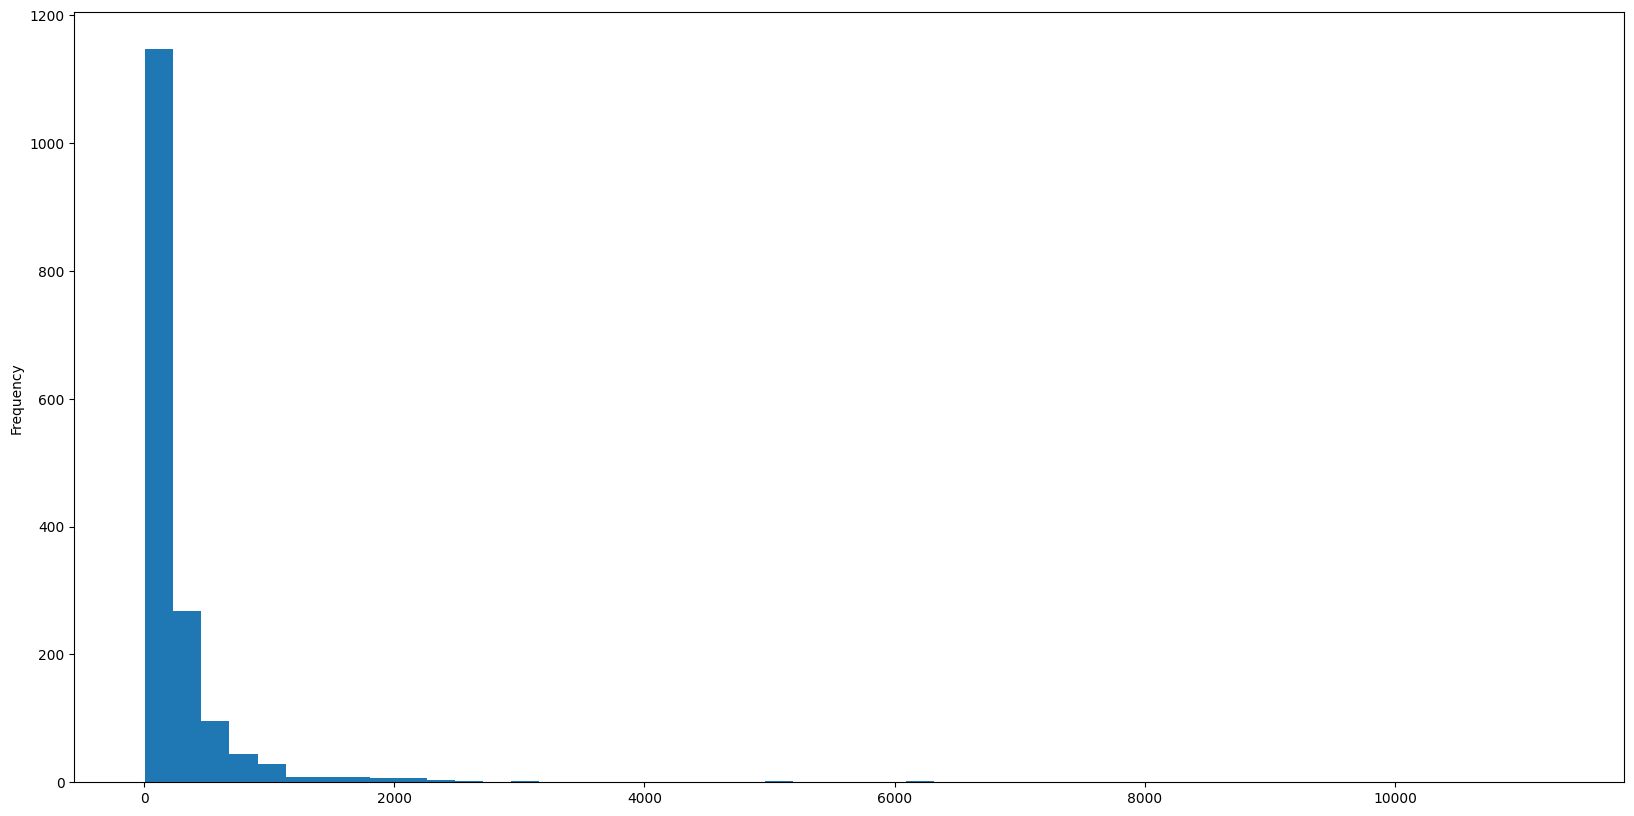

In [73]:
# let's plot word counts
df['word_count_cleaned'].plot.hist(bins=50, figsize=(20, 10))

In [74]:
# let's plot the same histogram with Plotly
# if you do not have Plotly installed you can install it with !pip install plotly
import plotly.express as px
fig = px.histogram(df, x="word_count_cleaned", nbins=50)
fig.show()

In [75]:
# let's do log scale on y axis
fig = px.histogram(df, x="word_count_cleaned", nbins=50, log_y=True)
fig.show()